### 利用matplotlib开源实现遥感影像显示
1、遥感影像单波段和彩色显示   
2、遥感直方图拉伸显示

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_img = 'data/Section-6/s2_chenggong_20200411_6bands_20m.tif'


In [41]:
dset_img = gdal.Open(path_img)
img_array = dset_img.ReadAsArray()
img_array = img_array.transpose(1,2,0)
print(img_array.shape)


(1630, 1490, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


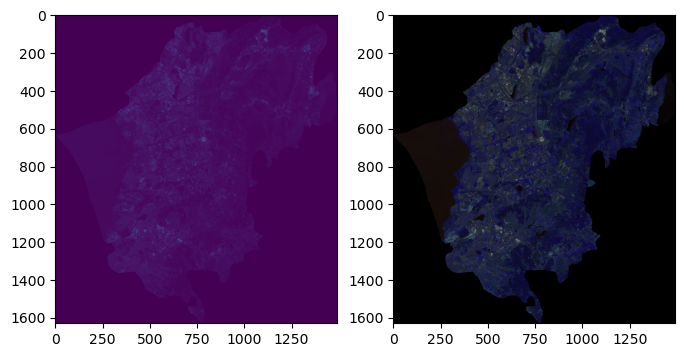

In [49]:
# print(img_array.min(), img_array.max())
img_array = img_array/10000
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(img_array[:,:,0])
ax[1].imshow(img_array[:,:,1:4])


#### 单波段直方图拉伸显示

0 17760
(2428700,)


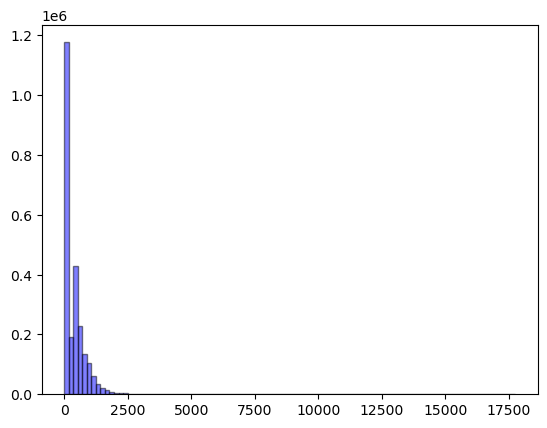

In [43]:
band_1 = img_array[:,:,0]
min_dn, max_dn = np.min(band_1), np.max(band_1)
print(min_dn, max_dn)
band_1_dn = band_1.flatten()
print(band_1_dn.shape)
n, bins, patches = plt.hist(band_1_dn, bins=100, ec="black", fc="blue", alpha=0.5)


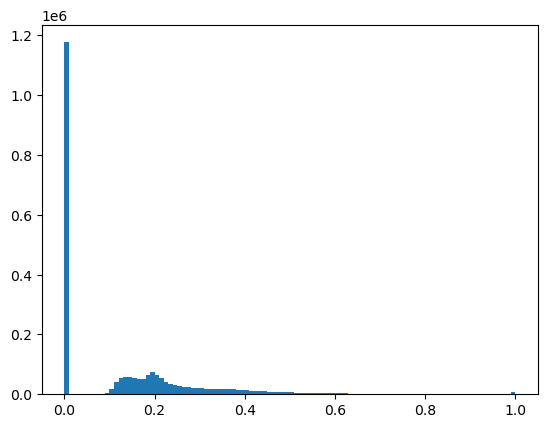

In [44]:
### 手动设置拉伸最大最小值进行直方图拉伸
min_dn, max_dn = 0, 2500
band_1_ = np.clip(band_1, min_dn, max_dn)  ## 限定像元值范围
band_1_ = band_1_/(max_dn-min_dn)    ## 归一化
band_1_dn_ = band_1_.flatten()
n, bins, patches = plt.hist(band_1_dn_, bins=100)


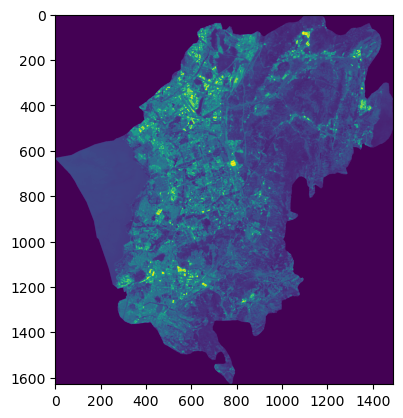

In [45]:
plt.imshow(band_1_)
# plt.imshow(band_1, vmin=min_dn, vmax=max_dn)   ## 快捷方式


0.0 1854.0


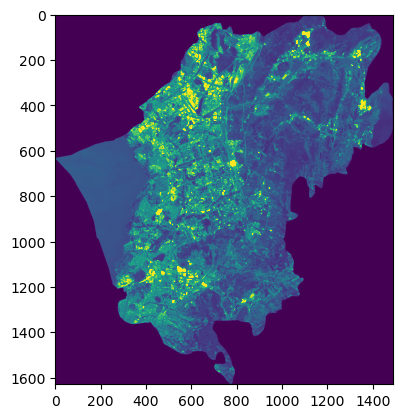

In [46]:
### 根据像元所占百分比确定直方图拉伸的最大值最小值, 利用np.percentile()
min_dn, max_dn = np.percentile(band_1, 1), np.percentile(band_1, 99) 
print(min_dn, max_dn)
plt.imshow(band_1, vmin=min_dn, vmax=max_dn)


#### 3波段直方图拉伸彩色显示


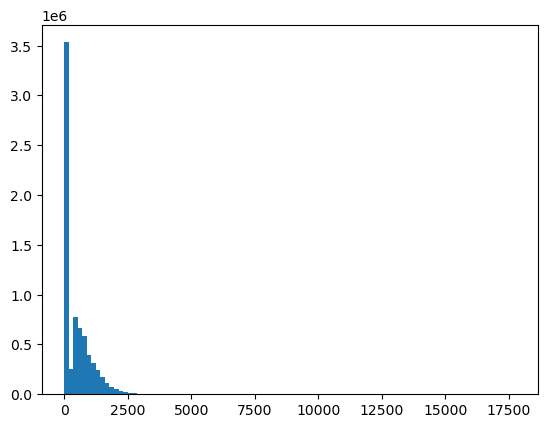

In [36]:
band_color = img_array[:,:,0:3].copy()
band_color_dn = band_color.flatten()
band_color_dn.shape
n, bins, patches = plt.hist(band_color_dn, bins=100)


注意：三波段彩色显示时，plt.imshow()函数的vmin和vmax参数失效，需要手动对图像像元至拉伸至0-1或0-255.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0 2370.0


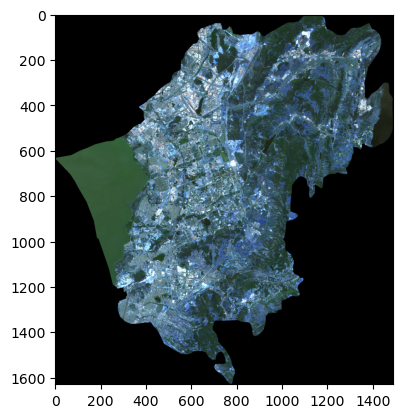

In [37]:
### 自动确定拉伸最大最小值
min_dn, max_dn = np.percentile(band_color_dn, 1), np.percentile(band_color_dn, 99)
print(min_dn, max_dn)
band_color_ = np.clip(band_color, min_dn, max_dn)
band_color_ = band_color/(max_dn-min_dn) 
plt.imshow(band_color_)


##### 任意彩色合成显示



Text(0.5, 1.0, 'color show')

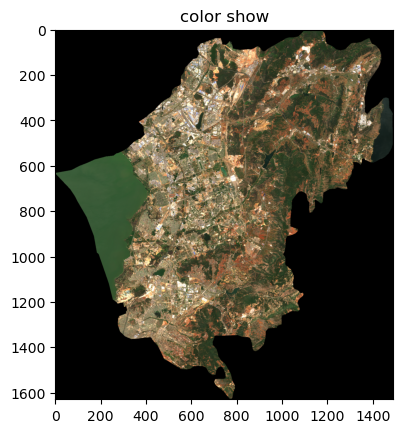

In [38]:
band_color_ = np.stack([img_array[:,:,2], img_array[:,:,1], img_array[:,:,0]], axis=2)   ### rgb: red:green:blue;  nir:red:green
band_color_ = np.clip(band_color_, min_dn, max_dn)
band_color_ = band_color_/(max_dn-min_dn)   ### 拉伸至0-1 
plt.imshow(band_color_)
plt.title('color show')


#### 添加经纬度坐标系

(874420.0, 20.0, 0.0, 2769600.0, 0.0, -20.0)
(874420.0, 904220.0, 2737000.0, 2769600.0)


Text(0, 0.5, 'y')

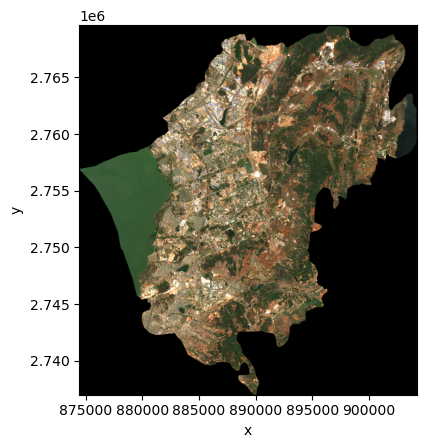

In [39]:
geo_trans = dset_img.GetGeoTransform()
print(geo_trans)
lon_min, lat_max = geo_trans[0], geo_trans[3]
lon_max = lon_min + geo_trans[1] * dset_img.RasterXSize
lat_min = lat_max + geo_trans[5] * dset_img.RasterYSize
extent = (lon_min, lon_max, lat_min, lat_max) 
print(extent)
plt.imshow(band_color_, extent=extent)
plt.xlabel('x'); plt.ylabel('y')
